# 1. Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Data Import

In [2]:
dataset = pd.read_csv('data.csv')

# Let's glance at the data
dataset.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [3]:
# The Position and Level columns are redundant
# So just include the Levels in X
X = dataset.iloc[:,1:-1].values 
y = dataset.iloc[:,-1].values

print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
# Let's take a look at the salary's response column too
print(y)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


# 3. Model Training
We have no missing values in the dataset.

In addition, since the dataset is small we don't want to do a horizonal split into the training set and test sets.  We need to feed our ML Algorithm as much input as possible to get the maximum accuracy

In [6]:
# Let's create two regression models.  
# The Simple Linear Regression model and the Polynomial Regression model.
# This way we can compare both models against the dataset so you can see why the latter is better.
from sklearn.linear_model import LinearRegression

# Simple Linear Regression model built
lin_reg = LinearRegression() 

 # Now let's train the Simple Linear Regression model on the dataset to learn the relationships between the Position Levels
 # and Salaries.  .fit() trains our model on the dataset.

 # Simple Linear Regression model trained!
lin_reg.fit(X,y)

LinearRegression()

In [7]:
# Now we will create a multiple linear regression model with one feature to multiple powers.
# We will not have multiple features just multiple degrees on the same feature...
# This is what makes it a Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression model built
# Contains the matrix of features X1, X1^2, and X1^n and start with the exponent equal to 2
poly_reg = PolynomialFeatures(degree=5)  

# Turn the matrix of  the single feature X into the "powered" versions of X: X^1 and X^2 
# We can save this in a new variable: X_poly
X_poly = poly_reg.fit_transform(X) 

# Now we have a new matrix of features that is POWERED
print(X_poly)

[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04 1.0000e+05]]


In [8]:
# We will use the same dependent variable vector y, the Salaries
print(y)

# So we can create a NEW Simple Linear Regression model...
lin_reg2 = LinearRegression()

# And make this new Simple Linear Regression model learn the relationships between the new POWERED matrix of features X in X_poly
lin_reg2.fit(X_poly,y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


LinearRegression()

# 4. Visualize Results

In [9]:
# First lets visualize the effects of the Simple Linear Regression model.
# We will produce the real positions and salaries first.
print(X)

print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


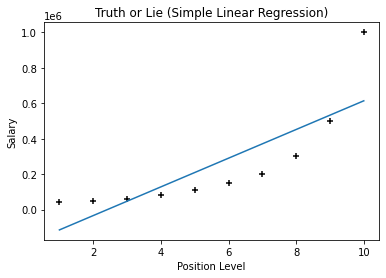

In [10]:
# Let's plot the real positions and salaries here
plt.scatter(X, y, color="black", marker="+")

# And now we will plot the predictions... the Simple Linear Regression line 
# the y coordinate will be the predicted results based on the matrix of feature X
plt.plot(X, lin_reg.predict(X)) 
plt.title("Truth or Lie (Simple Linear Regression)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [11]:
# So what are we passing into the predict() method for Polynomial Regression?
# X?
print(X)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [12]:
# No, X_poly right?
print(X_poly)

[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04 1.0000e+05]]


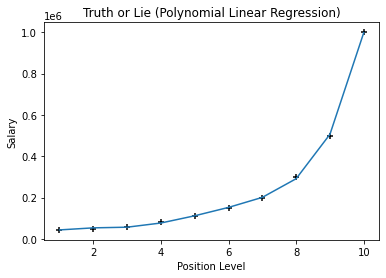

In [13]:
# So let's try the Polynomial Regression Model which is lin_reg2

# Let's plot the real positions and salaries here
# The black points are the real salaries
# The blue line is the predictions from the Simple Linear Regression model
# So clearly our model isn't adapted to this dataset.
plt.scatter(X, y, color="black", marker="+")

# So we can now plot the predictions... the Polynomial Linear Regression line 
# the y coordinate will be the predicted results based on the matrix of feature X_poly
plt.plot(X, lin_reg2.predict(X_poly)) 
plt.title("Truth or Lie (Polynomial Linear Regression)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [14]:
# We can replace the straight lines between connecting points with a smooth line by increasing the resolution of X
# between the points
print(X)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [15]:
min(X)

array([1], dtype=int64)

In [16]:
max(X)

array([10], dtype=int64)

In [17]:
np.arange(min(X),max(X),0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [18]:
X_grid = np.arange(min(X),max(X),0.1)

In [19]:
len(X_grid)

90

In [20]:
X_grid.reshape(len(X_grid),1)

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

In [21]:
X_grid = X_grid.reshape(len(X_grid),1)

# Now we will fit the Simply Linear Regression model to our high resolution X variable
lin_reg2.predict(poly_reg.fit_transform(X_grid))

array([ 43895.1048956 ,  46708.05221842,  48913.35489089,  50597.41868224,
        51840.64880226,  52717.63913207,  53297.36145488,  53643.35468679,
        53813.91410751,  53862.28059116,  53836.82983705,  53781.26160043,
        53734.78892325,  53732.32736494,  53804.68423321,  53978.74781477,
        54277.67660612,  54721.08854432,  55325.25023777,  56103.26619695,
        57065.26806523,  58218.60384959,  59568.02715143,  61115.88639733,
        62862.3140698 ,  64805.41593808,  66941.46028887,  69265.06715715,
        71769.3975569 ,  74446.3427119 ,  77286.71328647,  80280.4286163 ,
        83416.70593913,  86684.24962559,  90071.44040996,  93566.52462091,
        97157.80341227, 100833.82199385, 104583.55886214, 108396.61503113,
       112263.40326306, 116175.33729918, 120125.02109055, 124106.43802878,
       128115.14017679, 132148.43749964, 136205.5870952 , 140287.98242504,
       144399.34254509, 148545.90133647, 152736.59673623, 156983.25996817,
       161300.80477354, 1

In [26]:
X_poly_high_res = lin_reg2.predict(poly_reg.fit_transform(X_grid))

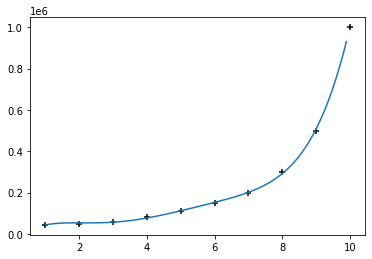

In [25]:
# Now we will fit the Simply Linear Regression model to our high resolution X variable
plt.scatter(X, y, color="black", marker="+")

# So we can now plot the predictions... the Polynomial Linear Regression line 
# using our high resolution gride X_grid
# the y coordinate will be the predicted results based on the high resolution matrix of feature X_poly_high_res
plt.plot(X_grid, X_poly_high_res)


# 5. Predict Results

In [28]:
# We will first make our predictions with the Simple Linear Regression model

lin_reg.predict(6.5)

ValueError: Expected 2D array, got scalar array instead:
array=6.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
# We need to add the position value as a 2D array... meaning it's in a double pair of square brackets
a = [1]
print(a)

[1]


In [46]:
a = [1,3]
print(a)

# This gives us an array with one row and two columns

[1, 3]


In [51]:
a = [[1,3],[3,7]]

# This gives us an array with two rows and two columns so it's 2D
# So this is how we pass values to the predict() method
print(a)

[[1, 3], [3, 7]]


In [54]:
# So let's make our prediction using the Simple Linear Regression model.
# This candidiate is asking for a $160k salary justified by making that same amount at their previous company
# Well, according to our model, they are grosslly underpaid as we should be paying them almost $350k per year!
# Something isn't right!
lin_reg.predict([[6.5]])

array([330378.78787879])

In [60]:
# So how do we apply to our Polynomial Regression Model?
# Remember, our Polynomial Regressor is named lin_reg2
lin_reg2.predict([[6.5]])

# This failed because we can't just put in 6.5.  Remember for Polynomial Regression
# we are taking the feature... in this case 6.5 and apply n degrees of powers to it.
# So if we have degress=5 then we need to transform the data so that it is:
# 6.5, (6.5)^2, (6.5)^3, (6.5)^4 , (6.5)^5

# We can do this by calling the fit_transform method on our poly_reg object


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 1)

In [58]:
# This failed
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765118])

In [ ]:
# So we see they are honest, we should be paying them $175k but they are only asking for $160k.  Great candidate! Hire him!